In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
from src.load_images import set_database, get_dataset_path
from src.show_images import show_img, show_imgs

In [3]:
set_database("custom")

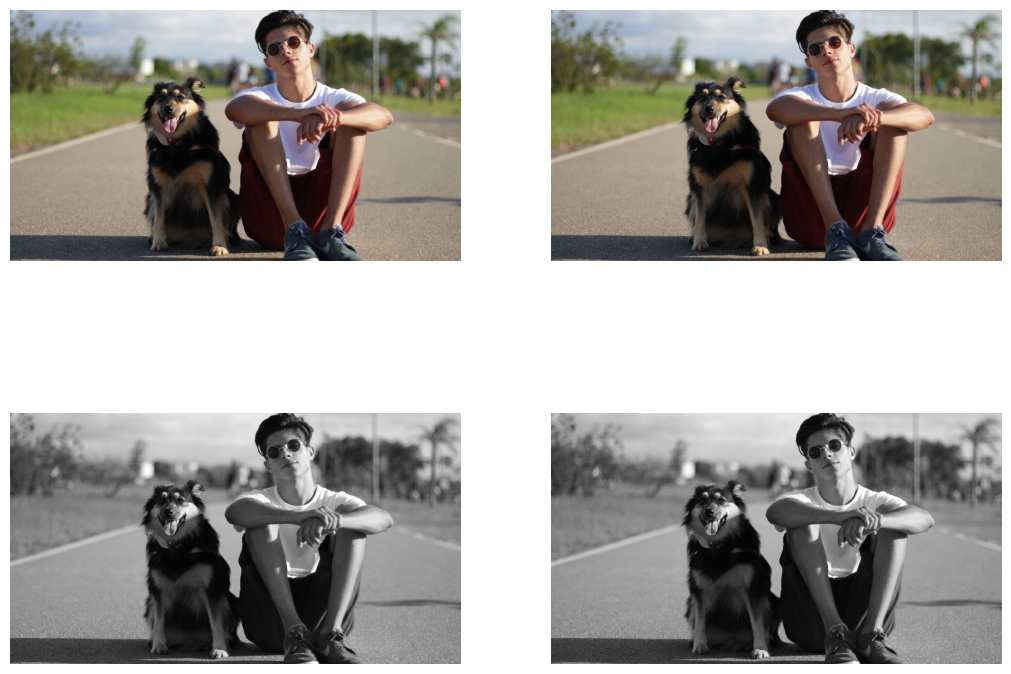

In [4]:
colord_img_origin = cv2.imread(get_dataset_path("image.jpg"), cv2.IMREAD_COLOR)
colord_img_origin = cv2.cvtColor(colord_img_origin, cv2.COLOR_BGR2RGB)
colord_img = colord_img_origin / 255

gray_img_origin = cv2.imread(get_dataset_path("image.jpg"), cv2.IMREAD_GRAYSCALE)
gray_img_origin = cv2.cvtColor(gray_img_origin, cv2.COLOR_BGR2RGB)
gray_img = gray_img_origin / 255

show_imgs([colord_img_origin, colord_img, gray_img_origin, gray_img], 2)

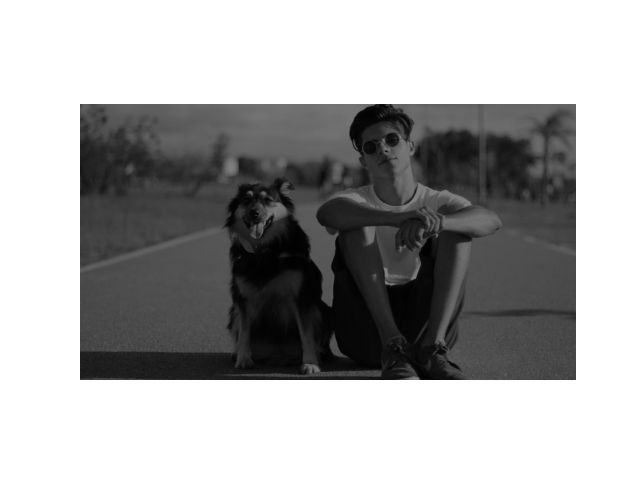

In [7]:
c, g = 0.5, 1
show_img(c * gray_img ** g)

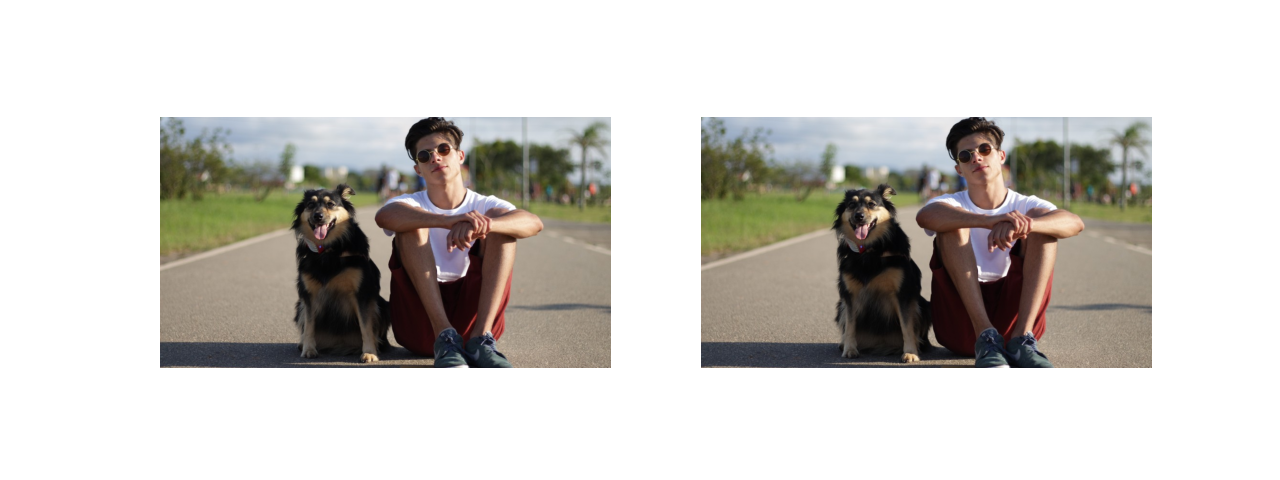

interactive(children=(FloatSlider(value=0.0, description='a', max=0.4, min=-0.4, step=0.05), FloatSlider(value…

In [6]:
%matplotlib widget

from math import acos, pi
import numpy as np

import matplotlib.pyplot as plt

from IPython.display import display

import ipywidgets

a, c, g = 0, 1, 1

img = colord_img.copy()

fig = plt.figure(figsize=(6.4 * 2, 4.8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')

for dim in range(3):
    img[:,:, dim] = a + c * img[:,:, dim] ** g

ax1.imshow(img.copy())

for dim in range(3):
    m1, m2 = img[:,:, dim].min() , img[:,:, dim].max()
    img[:,:, dim] = (img[:,:, dim] - m1) / (m2 - m1)

ax2 = fig.add_subplot(1, 2, 2)
ax2.axis('off')
    
ax2.imshow(img.copy())

plt.show()

def handle_event(a, c, g):
    fig.clf()
    img = colord_img.copy()
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.axis('off')

    for dim in range(3):
        img[:,:, dim] = np.fmax(np.fmin(a + c * img[:,:, dim] ** g, 1), 0)

    ax1.imshow(img.copy())

    for dim in range(3):
        m1, m2 = img[:,:, dim].min() , img[:,:, dim].max()
        if m2 - m1 == 0:
            l = 1
        else:
            l = (m2 - m1)
        img[:,:, dim] = (img[:,:, dim] - m1) / l

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.axis('off')
    
    ax2.imshow(img.copy())
        
# Make the slider controls interactive, and display them
slider_controls = ipywidgets.interactive(handle_event, 
                 a=ipywidgets.FloatSlider(min=-0.4, max=0.4, step=0.05, value=a),
                 c=ipywidgets.FloatSlider(min=0, max=1, step=0.05, value=c), 
                 g=ipywidgets.FloatSlider(min=0, max=2, step=0.05, value=g))

display(slider_controls)